## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading the data

In [2]:
df = pd.read_csv("C:\\Users\\Darshu\\Downloads\\House data.csv")
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,NaN,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,NaN,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     493 non-null    float64
 1   ZN       493 non-null    float64
 2   INDUS    496 non-null    float64
 3   CHAS     495 non-null    float64
 4   NOX      494 non-null    float64
 5   RM       496 non-null    float64
 6   AGE      497 non-null    float64
 7   DIS      496 non-null    float64
 8   RAD      495 non-null    float64
 9   TAX      494 non-null    float64
 10  PTRATIO  491 non-null    float64
 11  B        496 non-null    float64
 12  LSTAT    494 non-null    float64
 13  MEDV     500 non-null    float64
dtypes: float64(14)
memory usage: 54.8 KB


In [5]:
df.isnull().sum()

CRIM       7
ZN         7
INDUS      4
CHAS       5
NOX        6
RM         4
AGE        3
DIS        4
RAD        5
TAX        6
PTRATIO    9
B          4
LSTAT      6
MEDV       0
dtype: int64

In [6]:
df.shape

(500, 14)

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,493.000000,493.000000,496.000000,495.000000,494.000000,496.000000,497.000000,496.000000,495.000000,494.000000,491.000000,496.000000,494.000000,500.000000
mean,3.655323,11.247465,11.124819,0.070707,0.553837,6.288677,68.575252,3.785060,9.539394,407.489879,18.465784,356.595966,12.648178,22.564400
std,8.695102,23.233824,6.862173,0.256594,0.114877,0.707249,28.181075,2.104649,8.707922,168.483364,2.170162,91.632923,7.117030,9.236213
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.448250,5.884750,44.400002,2.097050,4.000000,279.000000,17.400000,375.299988,6.950000,17.075000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.699997,3.190950,5.000000,330.000000,19.100000,391.339996,11.430000,21.200001
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.629250,94.099998,5.118000,24.000000,666.000000,20.200001,396.209992,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [9]:
df.nunique()

CRIM       491
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         436
AGE        351
DIS        405
RAD          9
TAX         66
PTRATIO     46
B          351
LSTAT      444
MEDV       228
dtype: int64

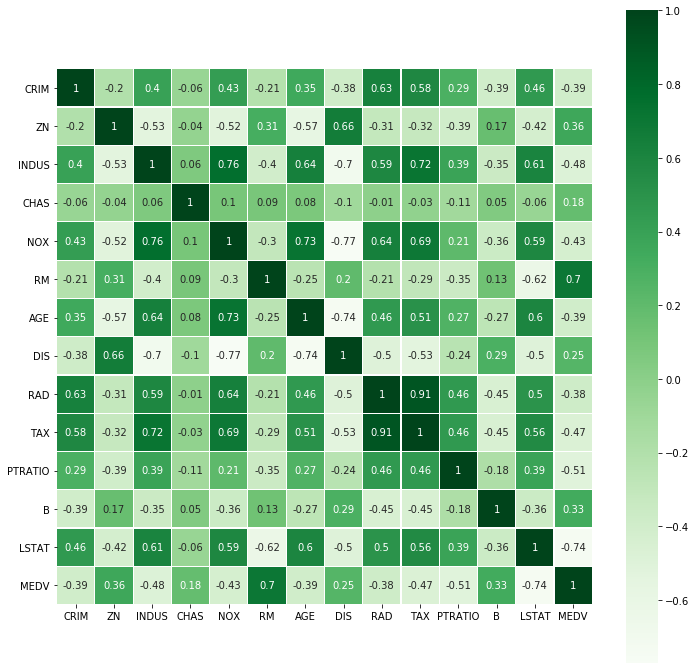

In [92]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='Greens',linewidths=0.2,square=True)

In [11]:
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296.0,15.300000,4.98,24.000000
1,6.421,242.0,17.799999,9.14,21.600000
2,7.185,242.0,17.799999,4.03,34.700001
3,6.998,222.0,18.700001,2.94,33.400002
4,7.147,222.0,18.700001,5.33,36.200001


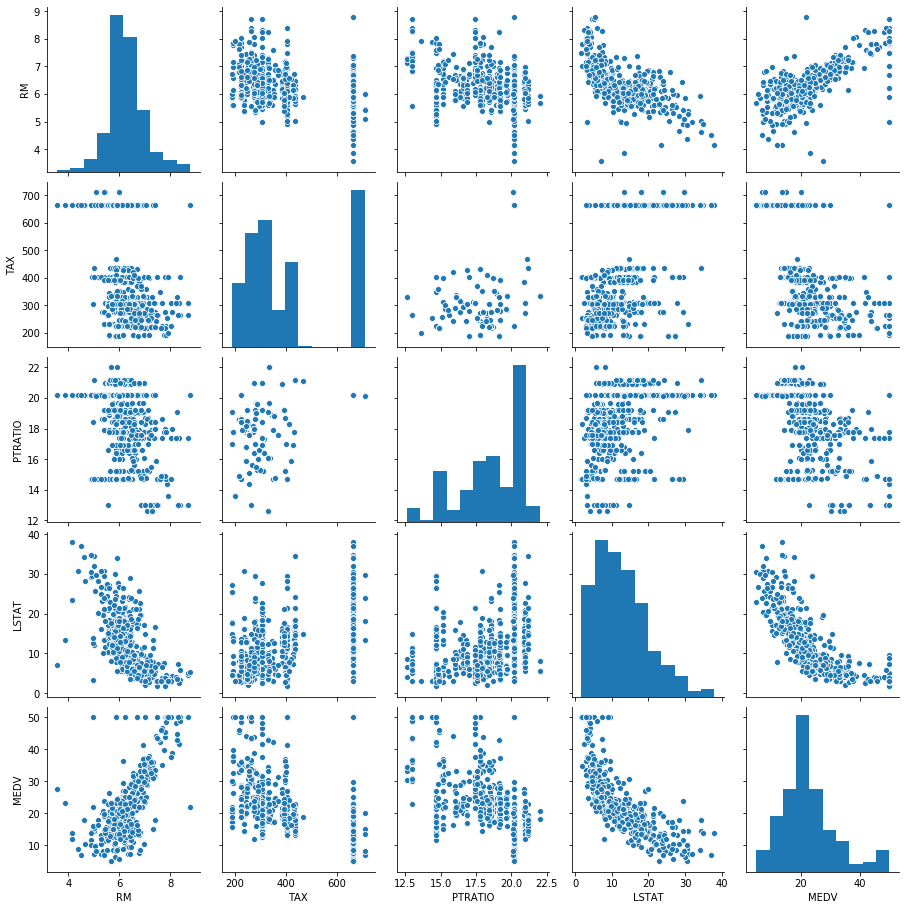

In [88]:
sns.pairplot(data=df1)

In [13]:
desc = df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,MEDV
count,496.00,494.00,491.00,494.00,500.00
mean,6.29,407.49,18.47,12.65,22.56
std,0.71,168.48,2.17,7.12,9.24
min,3.56,187.00,12.60,1.73,5.00
25%,5.88,279.00,17.40,6.95,17.08
50%,6.21,330.00,19.10,11.43,21.20
75%,6.63,666.00,20.20,16.95,25.00
max,8.78,711.00,22.00,37.97,50.00


### Univariate and Multivariate Analysis

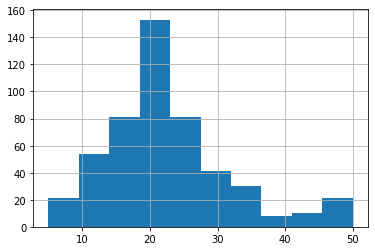

In [82]:
df['MEDV'].hist()

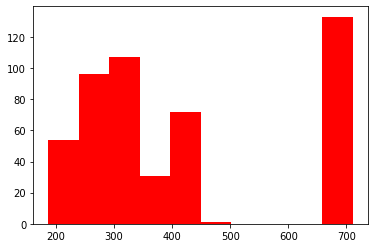

In [80]:
plt.hist(df.TAX,color='red')
plt.show()

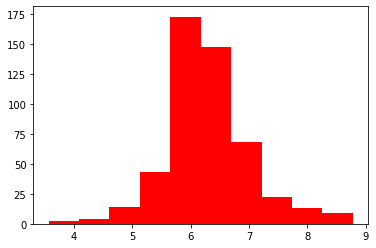

In [79]:
plt.hist(df.RM,color='red')
plt.show()

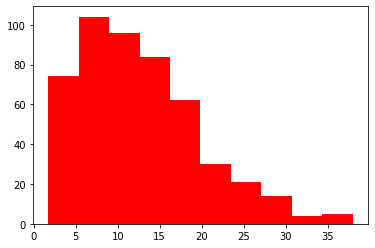

In [78]:
plt.hist(df.LSTAT,color='red')
plt.show()

C:\Users\Darshu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Darshu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


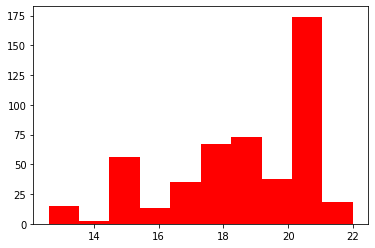

In [75]:
plt.hist(df.PTRATIO,color='red')
plt.show()

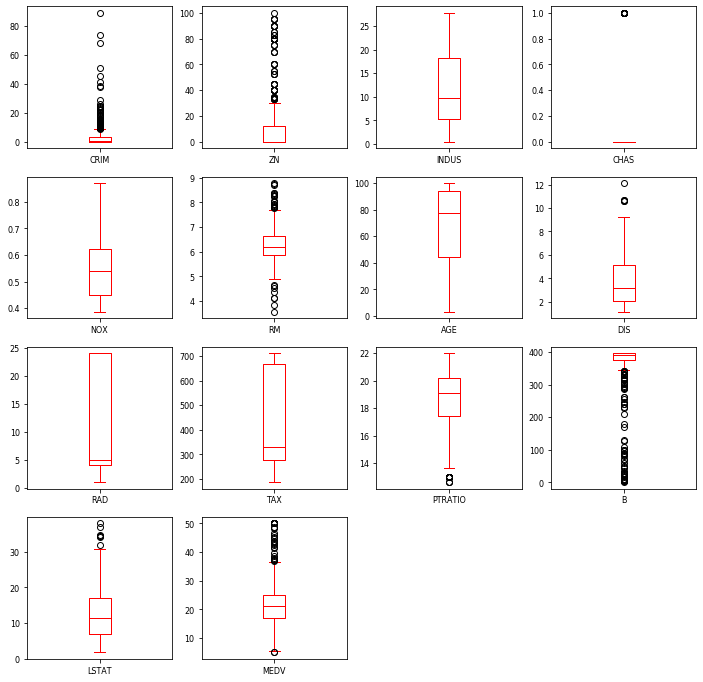

In [74]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(12,12),color='red');

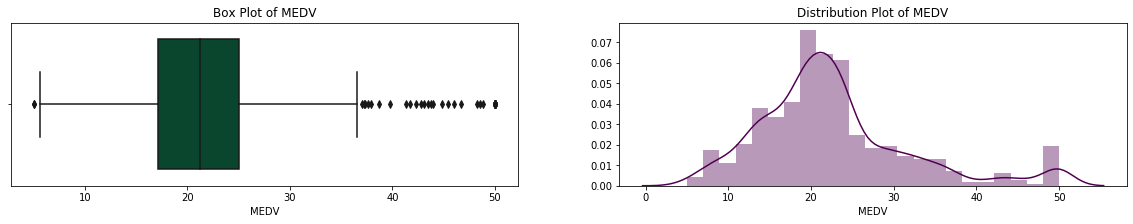

In [20]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.MEDV,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(a=df.MEDV,color='#500050')
plt.title('Distribution Plot of MEDV')
plt.show()

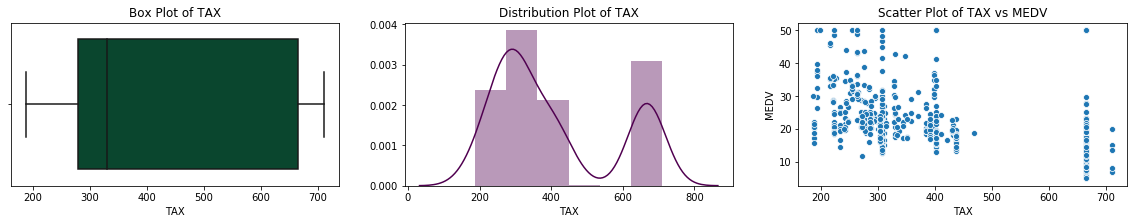

In [21]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.TAX,color='#005030')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a=df.TAX,color='#500050')
plt.title('Distribution Plot of TAX')

plt.subplot(1,3,3)
sns.scatterplot(df.TAX,df.MEDV)
plt.title('Scatter Plot of TAX vs MEDV')

plt.show()

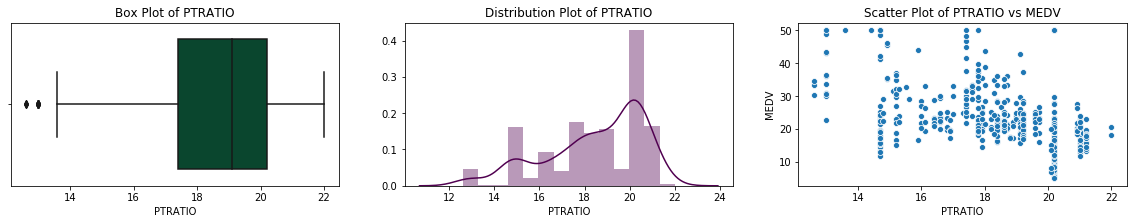

In [22]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=df.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(df.PTRATIO,df.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

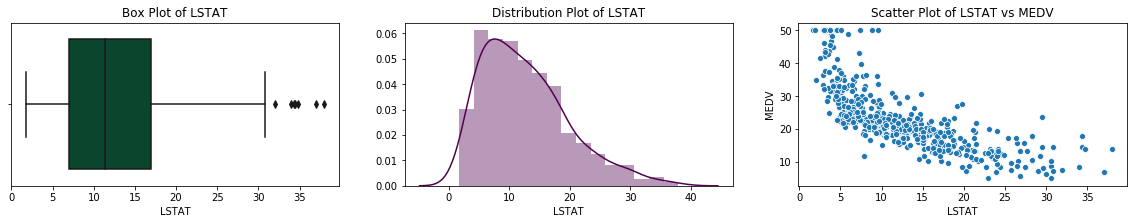

In [23]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=df.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(df.LSTAT,df.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

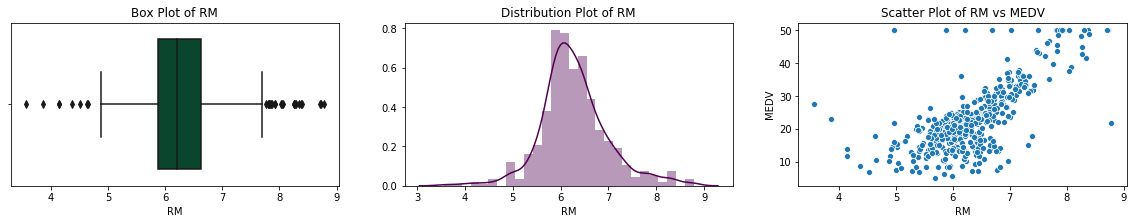

In [24]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df.RM,color='#005030')
plt.title('Box Plot of RM')

plt.subplot(1,3,2)
sns.distplot(a=df.RM,color='#500050')
plt.title('Distribution Plot of RM')

plt.subplot(1,3,3)
sns.scatterplot(df.RM,df.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

In [25]:
data = pd.DataFrame(data=df, columns=['TAX','RAD'])
data = data.fillna(0)
data.RAD.astype("category")
data.TAX.astype("category")

0      296.0
1      242.0
2      242.0
3      222.0
4      222.0
       ...  
495    273.0
496    273.0
497    273.0
498    273.0
499    273.0
Name: TAX, Length: 500, dtype: category
Categories (67, float64): [0.0, 187.0, 188.0, 193.0, ..., 437.0, 469.0, 666.0, 711.0]

## Imputing the values

In [26]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
mean_imputer.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [27]:
df_column_names = df.columns
df_column_names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
imputed_train_arr = mean_imputer.transform(df)
imputed_train_df = pd.DataFrame(imputed_train_arr, columns=df_column_names)
imputed_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.0,0.538000,6.575,65.199997,4.0900,1.0,296.0,15.300000,356.595966,4.98,24.000000
1,0.02731,0.000000,7.07,0.0,0.469000,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.000000,7.07,0.0,0.469000,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,11.247465,2.18,0.0,0.458000,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.000000,2.18,0.0,0.458000,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.06263,0.000000,11.93,0.0,0.573000,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67,22.400000
496,0.04527,0.000000,11.93,0.0,0.573000,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08,20.600000
497,0.06076,0.000000,11.93,0.0,0.553837,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64,23.900000
498,0.10959,0.000000,11.93,0.0,0.573000,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48,22.000000


In [29]:
imputed_train_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
imputed_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,356.595966,4.98,24.000000
1,0.02731,0.000000,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.000000,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,11.247465,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.000000,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [31]:
imputed_train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.655323,11.247465,11.124819,0.070707,0.553837,6.288677,68.575252,3.785060,9.539394,407.489879,18.465784,356.595966,12.648178,22.564400
std,8.633899,23.070286,6.834614,0.255305,0.114185,0.704408,28.096235,2.096197,8.664185,167.467375,2.150502,91.264918,7.074113,9.236213
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.449000,5.886500,44.850000,2.100525,4.000000,279.750000,17.400000,374.702492,7.092500,17.075000
50%,0.274475,0.000000,9.690000,0.000000,0.538000,6.211000,77.150002,3.215700,5.000000,330.000000,18.950000,391.259995,11.570000,21.200001
75%,3.659910,12.500000,18.100000,0.000000,0.624000,6.626000,94.025000,5.117025,24.000000,666.000000,20.200001,396.157509,16.910000,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [32]:
imputed_train_df.RAD.value_counts()
imputed_train_df.TAX.value_counts()

666.0    128
307.0     40
403.0     28
437.0     15
304.0     14
        ... 
337.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 67, dtype: int64

In [33]:
pd.get_dummies(imputed_train_df.RM,imputed_train_df.TAX)

,"0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_3.5610001089999996","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_3.862999916","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.138000011","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.368000031","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.519000053","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.627999783","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.65199995","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.8800001139999996","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.902999878","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_4.9060001369999995",...,"0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.246999741","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.258999825","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.265999793999999","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.296999931","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.336999893","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.375","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.397999763","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.704000472999999","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.725000381000001","0 296.0\n1 242.0\n2 242.0\n3 222.0\n4 222.0\n ... \n495 273.0\n496 273.0\n497 273.0\n498 273.0\n499 273.0\nName: TAX, Length: 500, dtype: float64_8.779999733"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data into test and train

In [34]:
X = imputed_train_df.drop(['MEDV'], axis = 1)
y = imputed_train_df['MEDV']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Standardscaler

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
stndrd=StandardScaler()
X_train=stndrd.fit_transform(X_train)

In [38]:
X_test=stndrd.transform(X_test)

In [39]:
X_train

array([[-0.4351039 , -0.5136814 , -1.3225528 , ...,  0.1553609 ,
         0.41198259, -1.06194089],
       [-0.4205837 , -0.5136814 , -0.18943384, ..., -0.26170821,
         0.38229619,  0.12435569],
       [-0.41721491, -0.5136814 , -0.63805059, ..., -0.2153671 ,
         0.44348194, -0.35581194],
       ...,
       [-0.42972216,  2.01070668, -1.39346318, ..., -0.03000354,
         0.39170053, -0.69757836],
       [ 0.74773786, -0.5136814 ,  0.98131104, ...,  0.8504749 ,
         0.44348194,  1.43351868],
       [-0.42211773, -0.5136814 , -0.39927065, ...,  1.17486091,
         0.41118936,  0.52826139]])

In [40]:
X_test

array([[ 0.13681059, -0.5136814 ,  0.98131104, ...,  0.8504749 ,
        -0.03467367, -0.79219965],
       [-0.42685629, -0.5136814 ,  0.21866259, ...,  0.1553609 ,
         0.28859137, -0.53516876],
       [ 2.54934508, -0.5136814 ,  0.98131104, ...,  0.8504749 ,
         0.44348194,  1.54791176],
       ...,
       [-0.39058802, -0.5136814 , -0.74079829, ..., -0.44707177,
         0.33561374, -1.35569052],
       [-0.34263638,  0.32778129, -1.06351285, ..., -2.48607267,
         0.39249376, -0.32191778],
       [ 0.63420216, -0.5136814 ,  0.98131104, ...,  0.8504749 ,
        -3.10812799,  0.69349558]])

### Linear Regression

In [41]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# importing the metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [46]:
# Value of y intercept
lm.intercept_

22.786857198894285

In [47]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [48]:
# Model Evaluation
print('R^2:',r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(Y_train, y_pred))
print('MSE:',mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_train, y_pred)))

R^2: 0.725922556648571
Adjusted R^2: 0.715318369852236
MAE: 3.5488458707653607
MSE: 24.57425323205961
RMSE: 4.957242502849706


In [49]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [50]:
# Model Evaluation
acc_linreg = r2_score(Y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(Y_test, y_test_pred))
print('MSE:',mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test, y_test_pred)))

R^2: 0.7391690085499294
Adjusted R^2: 0.7142366343672021
MAE: 3.0345199945229226
MSE: 19.35221924451663
RMSE: 4.399115734385336


### Randomforest Regression

In [51]:
reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [53]:
# Model Evaluation
print('R^2:',r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(Y_train, y_pred))
print('MSE:',mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_train, y_pred)))

R^2: 0.9795296092488662
Adjusted R^2: 0.9787376000828998
MAE: 0.9157542760060281
MSE: 1.8354103129623731
RMSE: 1.3547731592271723


In [54]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [55]:
# Model Evaluation
acc_rf = r2_score(Y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(Y_test, y_test_pred))
print('MSE:',mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test, y_test_pred)))

R^2: 0.887864065331675
Adjusted R^2: 0.8771451892236732
MAE: 1.9589600639327998
MSE: 8.319867132451648
RMSE: 2.884417988512006


## XGBoost Regressor 

In [56]:
##pip install xgboost

In [57]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg1 = XGBRegressor()

# Train the model using the training sets 
reg1.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [58]:
# Model prediction on train data
y_pred = reg1.predict(X_train)

In [59]:
# Model Evaluation
print('R^2:',r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(Y_train, y_pred))
print('MSE:',mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_train, y_pred)))

R^2: 0.9999986989989216
Adjusted R^2: 0.9999986486625704
MAE: 0.007578450488086713
MSE: 0.00011664998609700018
RMSE: 0.010800462309410657


In [62]:
#Predicting Test data with the model
y_test_pred = reg1.predict(X_test)

In [63]:
# Model Evaluation
acc_xgb = r2_score(Y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(Y_test, y_test_pred))
print('MSE:',mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test, y_test_pred)))

R^2: 0.9129586372165001
Adjusted R^2: 0.9046385069504302
MAE: 1.8497443899605726
MSE: 6.457988472011171
RMSE: 2.5412572620675715


## SVM Regressor 

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [66]:
# Train the model using the training sets 
reg.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [68]:
# Model Evaluation
print('R^2:',r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(Y_train, y_pred))
print('MSE:',mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_train, y_pred)))

R^2: 0.623722122900776
Adjusted R^2: 0.6091637526558655
MAE: 3.2604615644807136
MSE: 33.73771925331966
RMSE: 5.808417964757672


In [71]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [72]:
st_pred = reg.predict(X_test)
# Model Evaluation
acc_svm = r2_score(Y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(Y_test, y_test_pred))
print('MSE:',mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_test, y_test_pred)))

R^2: 0.731539544902309
Adjusted R^2: 0.705877883753265
MAE: 2.880334173134956
MSE: 19.918283316910735
RMSE: 4.462990400719089


In [73]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,91.295864
1,Random Forest,88.786407
0,Linear Regression,73.916901
3,Support Vector Machines,73.153954


FROM THE RESULT WE CAN CONCLUDED THAT XGBOOST WORKED VERY WELL FOR THIS MODEL WITH AN R2 SCORE OF 91.29.